# Bài thực hành 3
### Môn: Linear Algebra

In [1]:
import numpy as np

### Bài tập 1
Giải hệ phương trình tuyến tính ${\bf A}{\bf x}={\bf b}$ với

$${\bf A}=\left[\begin{matrix}
2 & 1 & -1 & -1 \\
2 & 5 & -7 & -5 \\
2 & -1 & 1 & 3 \\
5 & 2 & -4 & 2
\end{matrix}\right],\ 
{\bf b}=\left[\begin{matrix}
1 \\
-2 \\
4 \\
6
\end{matrix}\right]
$$

bằng phương pháp
* Ma trận nghịch đảo
* Phép khử Gauss
* Phân tích LU 

In [2]:
A = np.array([2,1,-1,-1,2,5,-7,-5,2,-1,1,3,5,2,-4,2],dtype=np.float64).reshape(4,4)
b = np.array([1,-2,4,6])
print(A)
print(b)

[[ 2.  1. -1. -1.]
 [ 2.  5. -7. -5.]
 [ 2. -1.  1.  3.]
 [ 5.  2. -4.  2.]]
[ 1 -2  4  6]


In [3]:
# Phương pháp ma trận nghịch đảo
A_inv = np.linalg.inv(A)
print(A_inv)
np.dot(A_inv,b)

[[ 1.  -1.  -2.   1. ]
 [-4.   7.5 16.5 -8. ]
 [-1.5  3.5  8.  -4. ]
 [-1.5  2.   4.5 -2. ]]


array([ 1. , -1. , -0.5,  0.5])

In [4]:
# Phân tích LU
from scipy import linalg
P,L,U = linalg.lu(A)
print("L, U")
print(L)
print(U)
y=np.linalg.solve(L,P.T@b)
np.linalg.solve(U,y)

L, U
[[ 1.          0.          0.          0.        ]
 [ 0.4         1.          0.          0.        ]
 [ 0.4         0.04761905  1.          0.        ]
 [ 0.4        -0.42857143  0.33333333  1.        ]]
[[ 5.          2.         -4.          2.        ]
 [ 0.          4.2        -5.4        -5.8       ]
 [ 0.          0.          0.85714286 -1.52380952]
 [ 0.          0.          0.          0.22222222]]


array([ 1. , -1. , -0.5,  0.5])

In [5]:
# Định nghĩa hàm thực hiện phép khử Gauss
def gauss_elim(A):
    m,n = A.shape
    if m>1:
        firstcol = np.abs(A[:,0])
        pivot_arg = np.argmax(firstcol)
        pivot = A[pivot_arg,0]
        if pivot==0:
            if n>1:
                gauss_elim(A[:,1:])
        else:
            row_swap = A[0,:].copy()
            A[0,:] = A[pivot_arg,:]
            A[pivot_arg,:] = row_swap
            for i in range(1,m):
                A[i,:] += -(A[i,0]/pivot)*A[0,:]
            if n>1:
                gauss_elim(A[1:,1:])

In [6]:
A = np.array([2,1,-1,-1,2,5,-7,-5,2,-1,1,3,5,2,-4,2],
             dtype=np.float64).reshape(4,4)
b = np.array([1,-2,4,6],dtype=np.float64).reshape(-1,1)

# Ma trận hệ số mở rộng
A_aug = np.hstack([A,b])

# Khử Gauss về dạng bậc thang
gauss_elim(A_aug)
print(A_aug)

# Giải hệ
np.linalg.solve(A_aug[:,:-1],A_aug[:,-1])

[[ 5.          2.         -4.          2.          6.        ]
 [ 0.          4.2        -5.4        -5.8        -4.4       ]
 [ 0.          0.          0.85714286 -1.52380952 -1.19047619]
 [ 0.          0.          0.          0.22222222  0.11111111]]


array([ 1. , -1. , -0.5,  0.5])

### Bài tập 2
Tìm đa thức nội suy 

$$y(x)=c_0\,f_0(x)+c_1\,f_1(x)+c_2\,f_2(x)+c_3\,f_3(x)$$

đi qua các điểm dữ liệu:

$$(1,1),\,(2,3),\,(3,5),\,(4,4)$$

với hệ hàm cơ sở $\{f_0,f_1,f_2,f_3\}$ được cho sau đây:
* $f_0=1,\,f_1=x,\,f_2=x^2,\,f_3=x^3$
* $f_0=1,\,f_1=x-1,\,f_2=(x-1)(x-2),\,f_3=(x-1)(x-2)(x-3)$

In [7]:
# Hệ hàm {f_0=1, f_1=x, f_2=x^2, f_3=x^3}
f_1 = lambda x: x
f_2 = lambda x: pow(x,2)
f_3 = lambda x: pow(x,3)
A=np.array([1 for x in range(1,5)])
col1=np.array([f_1(x) for x in range(1,5)])
col2=np.array([f_2(x) for x in range(1,5)])
col3=np.array([f_3(x) for x in range(1,5)])
A=np.vstack([A,col1,col2,col3]).T
b=np.array([1,3,5,4])
c=tuple(np.linalg.solve(A,b))
print("Đa thức nội suy: y(x)=%0.2f+%0.2f*x+%0.2f*x^2+%0.2f*x^3"%c)

Đa thức nội suy: y(x)=2.00+-3.50*x+3.00*x^2+-0.50*x^3


In [8]:
# Hệ hàm {g_0=1, g_1=x-1, g_2=(x-1)(x-2), g_3=(x-1)(x-2)(x-3)}
g_1 = lambda x: x-1
g_2 = lambda x: (x-1)*(x-2)
g_3 = lambda x: (x-1)*(x-2)*(x-3)
A_g=np.array([1 for x in range(1,5)])
col1=np.array([g_1(x) for x in range(1,5)])
col2=np.array([g_2(x) for x in range(1,5)])
col3=np.array([g_3(x) for x in range(1,5)])
A_g=np.vstack([A_g,col1,col2,col3]).T
c_g=tuple(np.linalg.solve(A_g,b))
print("Đa thức nội suy: y(x)=%0.2f+%0.2f*(x-1)+%0.2f*(x-1)(x-2)+%0.2f*(x-1)(x-2)(x-3)"%c_g)

Đa thức nội suy: y(x)=1.00+2.00*(x-1)+-0.00*(x-1)(x-2)+-0.50*(x-1)(x-2)(x-3)


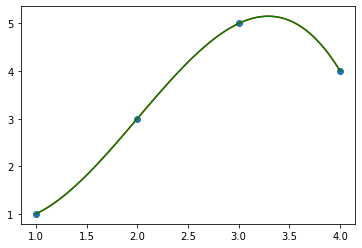

In [9]:
# Vẽ đồ thị
import matplotlib.pyplot as plt
y = lambda x: c[0]+c[1]*f_1(x)+c[2]*f_2(x)+c[3]*f_3(x)
y_g = lambda x: c_g[0]+c_g[1]*g_1(x)+c_g[2]*g_2(x)+c_g[3]*g_3(x)
xdata=np.arange(1,5)
plt.scatter(xdata,b)
x=np.linspace(1,4,100)
plt.plot(x,y(x),'r')
plt.plot(x,y_g(x),'g')
plt.show()

### Bài 3
Nghiệm của một bài toán truyền nhiệt dừng được xấp xỉ bởi nghiệm của hệ phương trình $Ax=b$, với $b=(5,15,0,10,0,10,20,30)$ và 

$$
A = \begin{pmatrix}
4 & -1 & -1 & 0 & 0 & 0 & 0 & 0 \\
-1 & 4 & 0 & -1 & 0 & 0 & 0 & 0 \\
-1 & 0 & 4 & -1 & -1 & 0 & 0 & 0 \\
0 & -1 & -1 & 4 & 0 & -1 & 0 & 0 \\
0 & 0 & -1 & 0 & 4 & -1 & -1 & 0 \\
0 & 0 & 0 & -1 & -1 & 4 & 0 & -1 \\
0 & 0 & 0 & 0 & -1 & 0 & 4 & -1 \\
0 & 0 & 0 & 0 & 0 & -1 & -1 & 4 \\
\end{pmatrix}
$$

* Tìm phân tích LU của $A$.
* Sử dụng phân tích LU để giải phương trình $Ax=b$.

In [10]:
from scipy import linalg
A = np.array([[4,-1,-1,0,0,0,0,0],
             [-1,4,0,-1,0,0,0,0],
             [-1,0,4,-1,-1,0,0,0],
             [0,-1,-1,4,0,-1,0,0],
             [0,0,-1,0,4,-1,-1,0],
             [0,0,0,-1,-1,4,0,-1],
             [0,0,0,0,-1,0,4,-1],
             [0,0,0,0,0,-1,-1,4]])
b = np.array([5,15,0,10,0,10,20,30])
P,L,U=linalg.lu(A)
print(P,L,U,sep="\n")

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]
[[ 1.          0.          0.          0.          0.          0.
   0.          0.        ]
 [-0.25        1.          0.          0.          0.          0.
   0.          0.        ]
 [-0.25       -0.06666667  1.          0.          0.          0.
   0.          0.        ]
 [ 0.         -0.26666667 -0.28571429  1.          0.          0.
   0.          0.        ]
 [ 0.          0.         -0.26785714 -0.08333333  1.          0.
   0.          0.        ]
 [ 0.          0.          0.         -0.29166667 -0.29213483  1.
   0.          0.        ]
 [ 0.          0.          0.          0.         -0.26966292 -0.08612836
   1.          0.        ]
 [ 0.          0.          0.          0.          0.         -0.29482402
  -0.29313813  1.        ]]
[[ 4.         -1.     

In [11]:
y = np.linalg.solve(L,b)
x = np.linalg.solve(U,y)
print('Nghiệm là:',x)

Nghiệm là: [ 3.9569378   6.58851675  4.23923445  7.39712919  5.60287081  8.76076555
  9.41148325 12.0430622 ]
